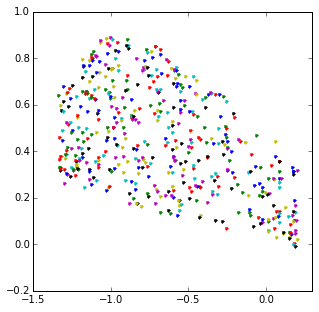

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt



A = np.mat('[1, 2; 3, 4; 5 0; -1, -5; -1 1; -1 0; 0.1 1]')
b = np.mat('[1;2;1; 0; 2; 1.35; 0.8]')
#print(A)

def oracle(x, A, b):
    y = A*x - b
    return np.all(y <= 0)

def binsearch(x, d, A, b):
    t = d
    while oracle(x+t, A, b):
        t = 2*t    
    l = x
    r = x+t 
    for i in range(20):
        m = (l+r)/2
        if oracle(m, A, b):
            l = m
        else:
            r = m   
    return m

for i in range(1000):
    x0 = np.random.randn(2,1)
    if oracle(x0, A, b):
        break

#print(y.T)
#plt.plot(x[0], x[1] ,'.')
x = x0
plt.figure(figsize=(5,5))
plt.gca().set_xlim((-1.5,0.3))
plt.gca().set_ylim((-0.2,1))
for i in range(500):
    d = np.random.randn(2,1)
    d = d/np.linalg.norm(d)
    
    left = binsearch(x, d, A, b)
    right = binsearch(x, -d, A, b)
    
    lam = np.random.rand(1,1)
    x = (lam*left+(1-lam)*right)
    # plt.plot([x[0],y[0]],[x[1],y[1]])
    plt.plot(x[0],x[1],'.')


Sample from $\exp(-\frac{1}{T} c^\top x)$

where $x = \lambda x_0 + (1-\lambda) x_1$

$c_0 = c^\top x_0$ and $c_1 = c^\top x_1$

$\exp(-\frac{1}{T} ( \lambda (c_0-c_1) + c_1)) \propto \exp(-\frac{\lambda}{T}  (c_0-c_1)) $

\begin{eqnarray}
\int \exp(-\frac{(c_0-c_1)}{T} \tau  ) d \tau & = &  -\frac{T}{(c_0-c_1)} \exp(-\frac{(c_0-c_1)}{T} \tau  ) |_{0}^\lambda \\
& = &  -\frac{T}{(c_0-c_1)} (1-\exp(-\frac{(c_0-c_1)}{T} \lambda) )  \\
Z & = & \frac{1}{\beta} (\exp(-\beta)-1)
\end{eqnarray}
\begin{eqnarray}
u & = & \frac{1}{Z \beta} (\exp(-\beta \lambda) -1 ) 
\end{eqnarray}


draw $u \sim \mathcal{U}[0, 1] $

Compute

$$
-\frac{1}{\beta} \log(Z \beta u + 1) =   \lambda  
$$

$$
-\frac{1}{\beta} \log(exp(-\beta)u - u + 1) =   \lambda  
$$


In [2]:
c0 = 1000
c1 = 1000
T = 0.001;

def draw_lambda(c0, c1, T):
    beta = (c0-c1)/T
    if beta== 0:
        return np.random.rand(1)
    else:
        u = np.random.rand(1)
        r = np.max([np.log(1-u),-beta+np.log(u)])
        lam = -1.0/beta * (r + np.log(np.exp(-beta + np.log(u) - r) + np.exp(np.log(1-u)-r)))
        return lam
        

        

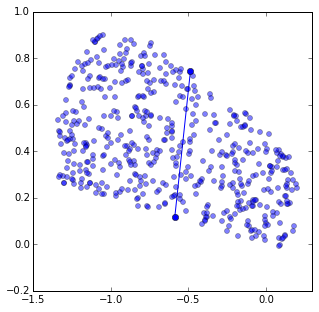

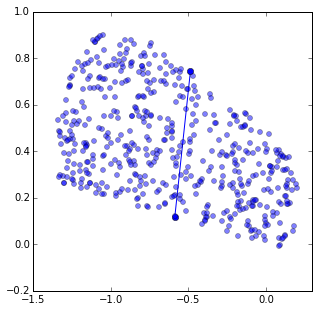

In [3]:
%matplotlib inline
import time
import pylab as plt
from IPython import display

x = x0
x = np.mat('[-0.5;0.4]')
#c = np.mat('[-1;-0.5]')
c = np.mat('[0;0]')
T = 0.1

fig = plt.figure(figsize=(5,5))
plt.gca().set_xlim((-1.5,0.3))
plt.gca().set_ylim((-0.2,1))
ax = fig.gca()
ln = plt.Line2D(xdata=(x0[0], x0[0]), ydata=(x0[1], x0[1]), marker='o', linestyle='-',linewidth=1)
ax.add_line(ln)

for i in range(500):
    d = np.random.randn(2,1)
    d = d/np.linalg.norm(d)
    
    left  = binsearch(x, d, A, b)
    right = binsearch(x,-d, A, b)
    
    ln.set_xdata((left[0],right[0]))
    ln.set_ydata((left[1],right[1]))
    
    c0 = c.T*left
    c1 = c.T*right
    
    lam = draw_lambda(c0, c1, T=1/(i+1))
    #x = (lam[0,0]*left+(1-lam[0,0])*right)
    x = (lam[0]*left+(1-lam[0])*right)
    # plt.plot([x[0],y[0]],[x[1],y[1]])

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.05)
    plt.plot(x[0],x[1],'bo', alpha=0.5, markersize=5)

In [ ]:
%matplotlib inline
import time
import pylab as plt
from IPython import display

x = x0
x = np.mat('[-0.5;0.4]')
#c = np.mat('[-1;-0.5]')
c = np.mat('[0;0]')
T = 0.1

fig = plt.figure(figsize=(5,5))
plt.gca().set_xlim((-1.5,0.3))
plt.gca().set_ylim((-0.2,1))
ax = fig.gca()
ln = plt.Line2D(xdata=(x0[0], x0[0]), ydata=(x0[1], x0[1]), marker='o', linestyle='-',linewidth=1)
ax.add_line(ln)

for i in range(500):
    d = np.random.randn(2,1)
    d = d/np.linalg.norm(d)
    
    left  = binsearch(x, d, A, b)
    right = binsearch(x,-d, A, b)
    
#    ln.set_xdata((left[0],right[0]))
#    ln.set_ydata((left[1],right[1]))
    
    c0 = c.T*left
    c1 = c.T*right
    
    lam = draw_lambda(c0, c1, T=1/(i+1))
    #x = (lam[0,0]*left+(1-lam[0,0])*right)
    xx = (lam[0]*left+(1-lam[0])*right)
    # plt.plot([x[0],y[0]],[x[1],y[1]])

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.05)
#    plt.plot(xx[0],xx[1],'bo', alpha=0.5, markersize=5)   
    plt.plot(np.hstack((left[0],right[0])), np.hstack((left[1],right[1])) , '-', alpha=0.5)

In [ ]:
np.hstack((left[0],right[0]))

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(5,5))
plt.gca().set_xlim((-1,1))
plt.gca().set_ylim((-1,1))
ax = fig.gca()
theta = np.pi/128
T = np.mat([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])

r = np.mat('[1, -1;0, 0]')

ln = plt.Line2D(xdata=r[0,:], ydata=r[1,:], marker='o', linestyle='-',linewidth=1)
ax.add_line(ln)

for i in range(20):
    ln.set_xdata(r[0,:])
    ln.set_ydata(r[1,:])
    #plt.plot()
    
    r = T*r
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)
    #plt.show()

In [ ]:
a = np.mat('[1,2]')
b = np.mat('[1;2]')

print(a*b)

a = np.array(a)
b = np.array(b)

a+b
a*b